In [73]:
 run ../util/analyze_sobol.py --ensemble_file ../historical/jib_borstadt_samples_20.csv ../historical/fldsum_test.csv

SyntaxError: invalid syntax (analyze_sobol.py, line 62)

In [37]:
df["pass"] = False
df[df["id"].isin(ids_pass)]["pass"] = True
df.loc[:, ("id", "pass")]


/var/folders/sn/_0x14wz901q964z4l3012ckh0000gn/T/ipykernel_24601/3736193707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["id"].isin(ids_pass)]["pass"] = True


In [46]:
df = df[df.loc[:, ("id")].isin(ids_pass)] = True





In [62]:
df = df[df.loc[:, ("id")].isin(ids_pass)] = True



AttributeError: 'bool' object has no attribute 'loc'

In [56]:
df["pass"].isnull()


0        False
1        False
2        False
3        False
4        False
         ...  
15355    False
15356    False
15357    False
15358    False
15359    False
Name: pass, Length: 15360, dtype: bool

In [74]:
ids_ok = df[((df["time"] > datetime(1986,1,1)) & (df["time"] < datetime(1987,1,1)))].groupby(by="id").mean()["total_grounding_line_flux (Gt year-1)"].isin([-10, -30])

In [86]:
id_df.drop(columns="id").values

array([[6.64794922e-01, 5.48339844e-01, 9.70410156e+04, 1.35351562e+00,
        2.87470703e-10, 1.00000000e+00],
       [5.34423828e-01, 5.48339844e-01, 9.70410156e+04, 1.35351562e+00,
        2.87470703e-10, 1.00000000e+00],
       [6.64794922e-01, 9.49707031e-01, 9.70410156e+04, 1.35351562e+00,
        2.87470703e-10, 1.00000000e+00],
       [6.64794922e-01, 5.48339844e-01, 9.51074219e+04, 1.35351562e+00,
        2.87470703e-10, 1.00000000e+00],
       [6.64794922e-01, 5.48339844e-01, 9.70410156e+04, 1.38671875e-01,
        2.87470703e-10, 1.00000000e+00],
       [6.64794922e-01, 5.48339844e-01, 9.70410156e+04, 1.35351562e+00,
        9.41113281e-11, 1.00000000e+00],
       [6.64794922e-01, 5.48339844e-01, 9.70410156e+04, 1.35351562e+00,
        2.87470703e-10, 0.00000000e+00],
       [5.34423828e-01, 9.49707031e-01, 9.51074219e+04, 1.38671875e-01,
        9.41113281e-11, 0.00000000e+00],
       [1.03979492e+00, 7.98339844e-01, 4.20410156e+04, 3.53515625e-01,
        7.82470703e-10, 

In [111]:
response_matrix.shape

(160,)

In [124]:
s_df

(Timestamp('1987-12-16 12:00:00'),
         id       vcm  fracture_softening  fracture_threshold  \
 95       0  0.664795            0.548340        97041.015625   
 191      1  0.534424            0.548340        97041.015625   
 287      2  0.664795            0.949707        97041.015625   
 383      3  0.664795            0.548340        95107.421875   
 479      4  0.664795            0.548340        97041.015625   
 ...    ...       ...                 ...                 ...   
 14975  155  0.781982            0.813965       119169.921875   
 15071  156  0.781982            0.813965        66103.515625   
 15167  157  0.781982            0.813965        66103.515625   
 15263  158  0.781982            0.813965        66103.515625   
 15359  159  0.698486            0.746582       119169.921875   
 
        fracture_healing_rate  fracture_healing_threshold  \
 95                  1.353516                2.874707e-10   
 191                 1.353516                2.874707e-10   


In [116]:
    Si = sobol.analyze(
        problem,
        response_matrix.reshape(1, -1),
        calc_second_order=False,
        num_resamples=100,
        print_to_console=False,
    )


AttributeError: 'Series' object has no attribute 'reshape'

In [126]:
ST_df.reset_index(inplace=True, drop=True)
ST_df.set_index(ST_df["Date"], inplace=True)


KeyError: 'Date'

In [128]:
ST_df = []
for s_df in df.groupby(by="time"):
    if id_df_missing is not None:
        response = s_df[1][["id", "total_grounding_line_flux (Gt year-1)"]]
        f = NearestNDInterpolator(params, response.values[:, 1], rescale=True)
        data = f(*np.transpose(id_df_missing.values[:, 1:8]))
        filled = pd.DataFrame(
            data=np.transpose([missing_ids, data]), columns=["id", m_var]
        )
        response_filled = response.append(filled)
        response_filled = response_filled.sort_values(by="id")
        response_matrix = response_filled[response_filled.columns[-1]].values
    else:
        response_matrix = s_df[1]["total_grounding_line_flux (Gt year-1)"].values
    Si = sobol.analyze(
        problem,
        response_matrix,
        calc_second_order=calc_second_order,
        num_resamples=100,
        print_to_console=False,
    )
    if calc_second_order:
        total_Si, first_Si, second_Si = Si.to_df()
    else:
        total_Si, first_Si = Si.to_df()

    t_df = pd.DataFrame(
        data=total_Si["ST"].values.reshape(1, -1), columns=total_Si.transpose().columns
    )
    t_df["date"] = s_df[0]
    t_df.set_index("date")
    ST_df.append(t_df)
ST_df = pd.concat(ST_df)
ST_df.reset_index(inplace=True, drop=True)
ST_df.set_index(ST_df["Date"], inplace=True)


KeyError: 'Date'

In [133]:
ST_df

,vcm,fracture_softening,fracture_threshold,fracture_healing_rate,fracture_healing_threshold,calving_rate_scaling_file,date
0,0.000392,1.169992,0.057321,6.672487e-10,9.075696e-10,0.000634,1980-01-16 12:00:00
1,0.002527,1.114483,0.014301,3.695535e-09,3.816362e-07,0.000278,1980-02-15 12:00:00
2,0.084696,0.944923,0.044815,5.123714e-08,2.771801e-09,0.001624,1980-03-16 12:00:00
3,0.099416,1.069180,0.078950,1.249682e-05,2.659729e-05,0.001658,1980-04-16 00:00:00
4,0.114859,1.027952,0.085658,1.185229e-05,8.888532e-04,0.004475,1980-05-16 12:00:00
...,...,...,...,...,...,...,...
91,0.788889,0.876467,0.180075,3.486495e-01,6.086102e-01,0.050989,1987-08-16 12:00:00
92,0.873568,0.881760,0.220138,2.032323e-01,7.910721e-01,0.058371,1987-09-16 00:00:00
93,0.873029,0.960645,0.297789,9.393876e-02,8.098477e-01,0.087776,1987-10-16 12:00:00
94,0.911296,0.973047,0.329020,1.050969e-01,8.179126e-01,0.106361,1987-11-16 00:00:00


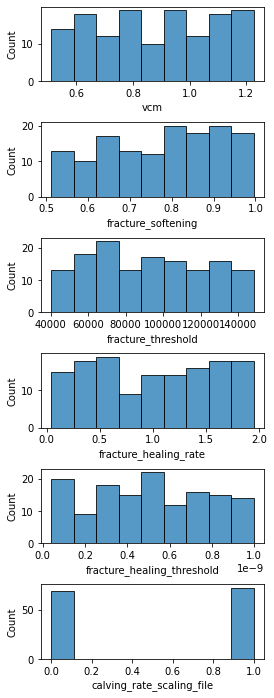

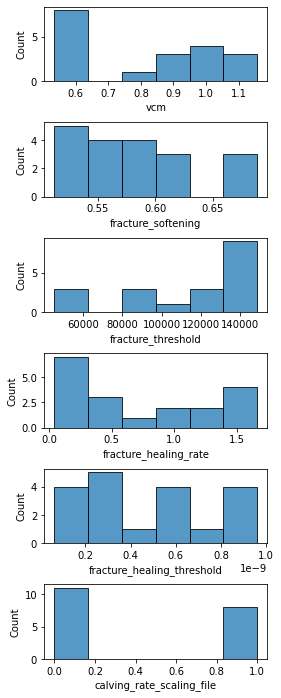

In [144]:
outside_df = m_df[m_df[m_var] < -30]
inside_df = m_df[m_df[m_var] >= -30]



fig, axs = plt.subplots(len(param_names), 1, figsize=[4, 12])
fig.subplots_adjust(hspace=0.55, wspace=0.25)
for k, p_var in enumerate(param_names):
    sns.histplot(data=inside_df, x=p_var, stat="count", linewidth=0.8, ax=axs[k])
    ax.set_title(p_var)
    fig.savefig(f"hist_inside_1985.pdf", bbox_inches="tight")

fig, axs = plt.subplots(len(param_names), 1, figsize=[4, 12])
fig.subplots_adjust(hspace=0.55, wspace=0.25)
for k, p_var in enumerate(param_names):
    sns.histplot(data=outside_df, x=p_var, stat="count", linewidth=0.8, ax=axs[k])
    ax.set_title(p_var)
    fig.savefig(f"hist_outside_1985.pdf", bbox_inches="tight")


In [146]:
!open hist_*_1985.pdf

In [6]:
ls

jib_analysis.ipynb
